# Classification

## 1. Introduction - regression or classification?

Linear regression assumes that the model's response is a numerical value. However, in many situations we are not dealing with values, but __qualitative variables__ - observed characteristics - e.g. eye color, car brand, etc. These variables are also called __factor__, __categorical variables__ or __enumerative__.
Qualitative variables can be further divided into:

- binary - having two levels, e.g. gender (male / female), occurrence of a given characteristic (Yes / No), achievement of a goal (Yes / No)
- nominal - unordered quality variables - e.g. car brand (Honda, Ford, Skoda, etc.), favorite team, place of occurrence (Warszawa, Kraków, Poznań)
- ordered - e.g. assessment (1 - 6), education (primary / secondary / higher)

Classification methods seek to predict __factor variables__. Often, these methods predict the probability of a feature and classify on that basis. Therefore, in some extent, some algorithms may work similarly to regression methods.
Examples of classification methods:
- if the patient with hypertension has a set of non-numeric features such as medications used, side-effects and numerical blood pressure, we want to recognize the type of hypertension he has
- based on the previous account history was the transaction our client made a fraud or not?
- the drug molecule has certain characteristics (usually numeric) - will it treat migraine?
- etc.
Usually, categorical variables are words, not numbers ('small' / 'large'; 'fast' / 'slow', etc.), so when using traditional statistical methods, these variables should be converted to discrete numbers (0, 1). Fortunately, most of the tools used for classification cope with 'label' data and convert it to discrete variables.

## 2. Data set

![alt text](./img/Zreport_20200313_142333.png "Publikacja ACS")

The data set address the problem of biodegradability of a compound in the environment. Substances which do not degrade are a potential threat to the living organisms. They can spread in the environment and finally accumulate in organisms. Chronic exposure to chemical compounds can be harmful to the living organisms. Therefore, in addition to the laboratory tests, legislators in Europe recommend the use of other methods, e.g. QSPR (quantitative structure-property relationships) for the assessment of chemical compounds.
  For our purposes, we will use the database available in the publication [_Quantitative Structure – Activity Relationship Models for Ready Biodegradability of Chemicals, Kamel Mansouri, Tine Ringsted, Davide Ballabio, Roberto Todeschini, and Viviana Consonni. Journal of Chemical Information and Modeling 2013 53 (4), 867-878. DOI: 10.1021 / ci4000213_](https://pubs.acs.org/doi/pdf/10.1021/ci4000213 "ACS Publication").
  Molecular descriptors (independent variables) of 1055 molecules were gathered in the database. These variables were used to develop a classification model, which was predicting biodegradablility of the molecules. The output variable (dependent variable) had two categories - biodegradable  (RB) and non-biodegradable (NRB) particle trends. In addition, an external validation set consisting of 670 particles was used to validate the models.

## 3. Methods

During the seminar we will use the Python library [Scikit-Learn](https://scikit-learn.org/stable/ "Scikit-Learn"). This library was introduced by David Cournapeau in 2007 and it is constantly developing. It contains a number of useful algorithms that can be easily implemented in Machine Learning tasks. In our case, we will use classification-related methods.

We will use the most popular classification methods for our task, such as:
- Logistic Regression
- Naive Bayes classifier (Naïve Bayes)
- Stochastic gradient descent (SGD)
- K nearest neighbors (K-Nearest Neighbors)
- Support Vector Machines
- Decision Tree
- Random Forest

Please be advised! These are not the only algorithms available in the Scikit-Learn library that can be applied to classification problems. Other methods, e.g. artificial neural networks have been described on the available models page [Scikit-Learn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning 'Available classifier algorithms')

## 4. Assessment of classification models

The simplest measures that determine the quality of classification models are the total classification error rate ($ Err $) and classifier accuracy ($ Acc $). These measures are defined by:

$$ Err = \frac {n_ {err}} {n_ {test}} $$  

$$ Acc = \frac {n_ {prop}} {n_ {test}} $$

where
- $ {n_ {err}} $, means the number of misclassified samples in the test set
- $ {n_ {test}} $, specifies the size of this set
- $ {n_ {prop}} $, means the number of correctly classified samples


The basic parameter describing the quality of the classification model is the confusion matrix (or error matrix). In the case of binary classifiers (P - positive, N - negative), the error matrix takes the form of a table with two columns and two lines:
  
 | | Expected classes ||
 | ------------ | ----------------------- ||
 | **observed classes** | Positive | Negative
 | Positive | TP | FN
 | Negative | FP | TN

where
- TP, True-Positive system response,
- TN, True-Negative system response,
- FP, False-Positive system response,
- FN, False-Negative system response

Based on the values of TP, TN, FP and FN, one can define other measures, such as sensitivity or recall ($ Recall $ = $ Sens $), specificity ($ Spec $), precision ($ Prec $):
  
$$ Prec = \frac {TP} {TP + FP} $$  

$$ Sens = Recall = \frac {TP} {TP + FN} $$  

$$ Spec = \frac {TN} {FP + TN} $$  
  
The parameters $ Err $ and $ Acc $ can also be calculated:
  
$$ Err = \frac {FN + FP} {TP + TN + FP + FN} = {1-Acc} $$  

$$ Acc = \frac {TP + TN} {TP + TN + FP + FN} $$  

Another measure of classification efficiency is $ F_ {1} $ defined as the harmonic average of precision and sensitivity:

$$ F_ {1} = \frac {{2Prec} * Recall} {Prec + Recall} = \frac {{2TP}} {{2TP} + FP + FN} $$

## 5. Imports

In order to use the libraries such as `numpy` or ` pandas` in Python we have to import them. To do this we will use `keyword` - `import`. If one want to import only a part of the library (a function) he need to use a structure `from <library> import <function>`.


`conda create --name classif python=3.6.5 numpy pandas matplotlib seaborn scikit-learn nb_conda_kernels jupyter`

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import SGDClassifier # Stochastic gradient descent
from sklearn.neighbors import KNeighborsClassifier # kNN 
from sklearn.svm import SVC # support vector machines
from sklearn.tree import DecisionTreeClassifier # decision tree
from sklearn.ensemble import RandomForestClassifier # random forest

## 6. Loadaing data and exploratory analysis

As at previous class first we need to load data, clean and transform it and perform exploratory analysis preferably. Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.  
In principle, data mining and visualization should be performed at every stage of the Machine Learning process. The main stages of the ML process are outlined below.

![alt text](img/ryc_2.png "Etapy procesu ML")

In [2]:
my_data = pd.read_csv('ci4000213_si_001.csv', sep = '\t')

In [3]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           1055 non-null   int64  
 1   CAS-RN          1055 non-null   object 
 2   PREFERRED_NAME  1055 non-null   object 
 3   Smiles          1055 non-null   object 
 4   Status          1055 non-null   object 
 5   mw              1055 non-null   float64
 6   SpMax_L         1055 non-null   float64
 7   J_Dz(e)         1055 non-null   float64
 8   nHM             1055 non-null   int64  
 9   F01[N-N]        1055 non-null   int64  
 10  F04[C-N]        1055 non-null   int64  
 11  NssssC          1055 non-null   int64  
 12  nCb-            1055 non-null   int64  
 13  C%              1055 non-null   float64
 14  nCp             1055 non-null   int64  
 15  nO              1055 non-null   int64  
 16  F03[C-N]        1055 non-null   int64  
 17  SdssC           1055 non-null   f

We remove columns that are irrelevant from the point of view of the method (`CAS-RN, PREFERRED_NAME, Smiles, Status`) by using the` drop () `method.

In [4]:
cols_to_drop = [1,2,3,4]
my_data.drop(my_data.columns[cols_to_drop],axis=1,inplace=True)
my_data

,Index,mw,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,Class
0,1,156.31156,3.919,2.6909,0,0,0,0,0,31.4,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,2,72.10652,4.170,2.1144,0,0,0,0,0,30.8,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3,178.22692,3.932,3.2512,0,0,0,0,0,26.7,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,4,46.02488,3.000,2.7098,0,0,0,0,0,20.0,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,5,204.26480,4.236,3.3944,0,0,0,0,0,29.4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,1051,155.23998,5.431,2.8955,0,0,0,2,0,32.1,...,0,6,1,3.573,2.242,1,8.088,0,0,NRB
1051,1052,423.37674,5.287,3.3732,0,0,9,0,0,35.3,...,0,3,0,3.787,3.083,3,9.278,0,0,NRB
1052,1053,445.47762,4.869,1.7670,0,1,9,0,5,44.4,...,4,13,0,3.848,2.576,5,9.537,1,0,NRB
1053,1054,610.52610,5.158,1.6914,2,0,36,0,9,56.1,...,1,16,0,5.808,2.055,8,11.055,0,1,NRB


In [5]:
my_data.shape

(1055, 44)

In [6]:
my_data.Class = my_data.Class.astype('category')

In [7]:
nrows = my_data.shape[0]
ncols = my_data.shape[1]

In [8]:
X = my_data.iloc[:,1:(ncols-1)]

In [9]:
X

,mw,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,...,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
0,156.31156,3.919,2.6909,0,0,0,0,0,31.4,2,...,0,0,0,0,2.949,1.591,0,7.253,0,0
1,72.10652,4.170,2.1144,0,0,0,0,0,30.8,1,...,0,0,0,0,3.315,1.967,0,7.257,0,0
2,178.22692,3.932,3.2512,0,0,0,0,0,26.7,2,...,0,0,0,1,3.076,2.417,0,7.601,0,0
3,46.02488,3.000,2.7098,0,0,0,0,0,20.0,0,...,0,0,0,1,3.046,5.000,0,6.690,0,0
4,204.26480,4.236,3.3944,0,0,0,0,0,29.4,2,...,0,0,0,0,3.351,2.405,0,8.003,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,155.23998,5.431,2.8955,0,0,0,2,0,32.1,4,...,2,0,6,1,3.573,2.242,1,8.088,0,0
1051,423.37674,5.287,3.3732,0,0,9,0,0,35.3,0,...,0,0,3,0,3.787,3.083,3,9.278,0,0
1052,445.47762,4.869,1.7670,0,1,9,0,5,44.4,0,...,0,4,13,0,3.848,2.576,5,9.537,1,0
1053,610.52610,5.158,1.6914,2,0,36,0,9,56.1,0,...,0,1,16,0,5.808,2.055,8,11.055,0,1


In [10]:
y = my_data.iloc[:,ncols-1:ncols]

In [11]:
y.head()

,Class
0,RB
1,RB
2,RB
3,RB
4,RB


In [12]:
y.tail()

,Class
1050,NRB
1051,NRB
1052,NRB
1053,NRB
1054,NRB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F04AC79F98>],
      dtype=object)

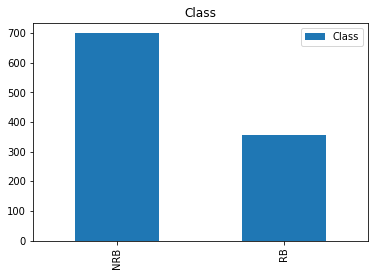

In [13]:
y.apply(pd.value_counts).plot(kind='bar', subplots=True)

In [14]:
# Columns with NaN
my_data.isnull().any(axis=0)

Index          False
mw             False
SpMax_L        False
J_Dz(e)        False
nHM            False
F01[N-N]       False
F04[C-N]       False
NssssC         False
nCb-           False
C%             False
nCp            False
nO             False
F03[C-N]       False
SdssC          False
HyWi_B(m)      False
LOC            False
SM6_L          False
F03[C-O]       False
Me             False
Mi             False
nN-N           False
nArNO2         False
nCRX3          False
SpPosA_B(p)    False
nCIR           False
B01[C-Br]      False
B03[C-Cl]      False
N-073          False
SpMax_A        False
Psi_i_1d       False
B04[C-Br]      False
SdO            False
TI2_L          False
nCrt           False
C-026          False
F02[C-N]       False
nHDon          False
SpMax_B(m)     False
Psi_i_A        False
nN             False
SM6_B(m)       False
nArCOOR        False
nX             False
Class          False
dtype: bool

In [15]:
# Rows with NaN
my_data.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1050    False
1051    False
1052    False
1053    False
1054    False
Length: 1055, dtype: bool

In [16]:
my_data_num = my_data.drop(['Index'], axis = 1)
my_data_num.head()

,mw,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,Class
0,156.31156,3.919,2.6909,0,0,0,0,0,31.4,2,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,72.10652,4.170,2.1144,0,0,0,0,0,30.8,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,178.22692,3.932,3.2512,0,0,0,0,0,26.7,2,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,46.02488,3.000,2.7098,0,0,0,0,0,20.0,0,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,204.26480,4.236,3.3944,0,0,0,0,0,29.4,2,...,0,0,0,3.351,2.405,0,8.003,0,0,RB


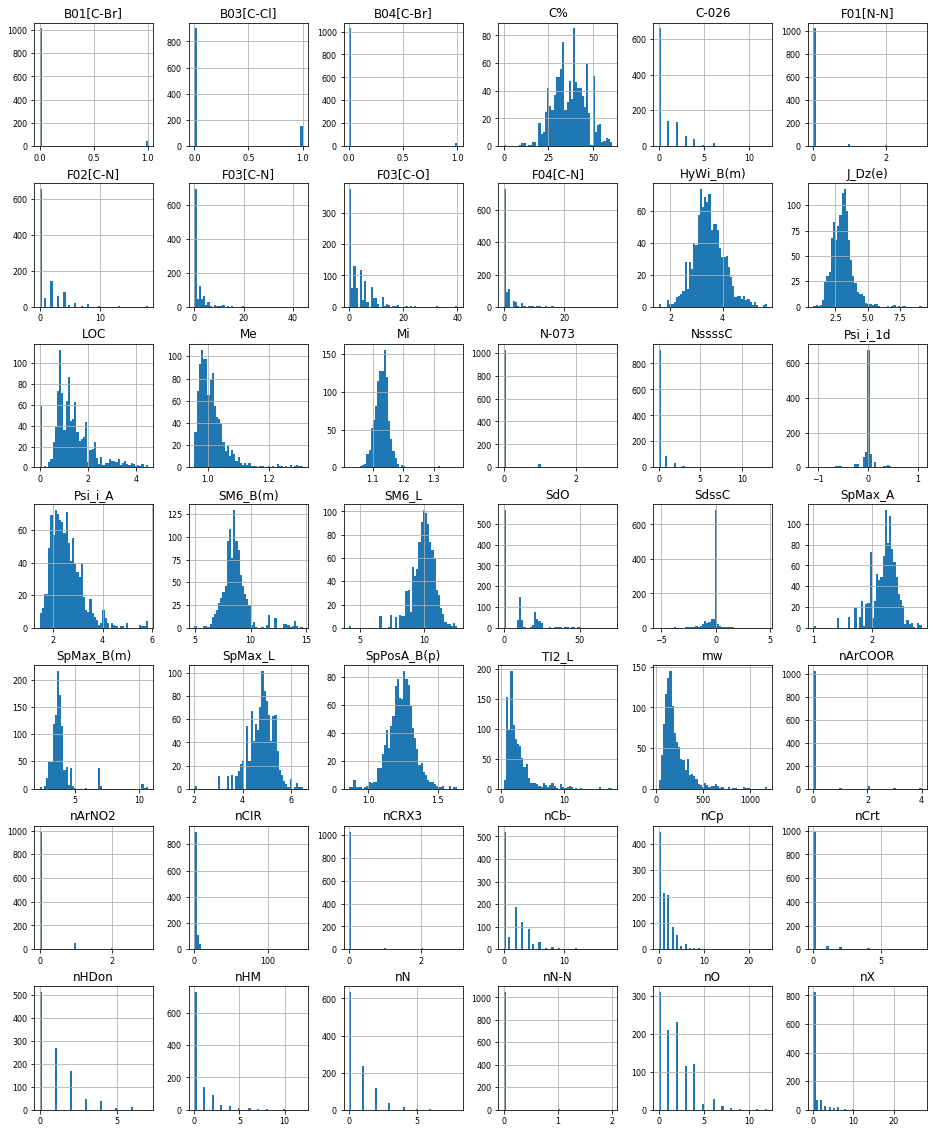

In [17]:
my_data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [18]:
my_data_num_corr = my_data_num.corr()
my_data_num_corr

,mw,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,...,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
mw,1.000000,0.480456,0.045715,0.438321,0.115186,0.264986,0.370209,0.457707,0.154826,0.330664,...,0.095313,0.394769,0.189499,-0.024670,0.385308,-0.103702,0.102607,0.633994,0.101423,0.405758
SpMax_L,0.480456,1.000000,0.232683,0.261817,0.022219,0.185560,0.446789,0.423223,0.381464,0.202214,...,0.232447,0.311775,0.137806,0.033485,0.305638,0.101423,0.056802,0.489765,0.086938,0.339627
J_Dz(e),0.045715,0.232683,1.000000,0.067649,-0.094366,-0.186095,0.351183,-0.260477,-0.300082,0.150766,...,-0.203189,-0.113457,-0.181558,0.009668,0.085867,0.513404,-0.088993,0.087903,-0.071860,0.389997
nHM,0.438321,0.261817,0.067649,1.000000,0.022182,0.003350,0.068106,0.258438,0.097963,-0.122079,...,0.203298,0.439112,-0.036748,-0.135023,0.458958,0.051879,-0.042725,0.572485,-0.044127,0.542703
F01[N-N],0.115186,0.022219,-0.094366,0.022182,1.000000,0.449388,0.006723,0.191410,-0.038907,0.024662,...,-0.033625,0.212653,0.501351,0.134878,-0.005597,0.023329,0.462634,0.040402,-0.015143,0.000753
F04[C-N],0.264986,0.185560,-0.186095,0.003350,0.449388,1.000000,0.001928,0.372453,0.146439,0.007436,...,-0.035533,0.329136,0.789358,0.209706,0.041273,-0.030193,0.745717,0.147088,-0.043254,-0.021033
NssssC,0.370209,0.446789,0.351183,0.068106,0.006723,0.001928,1.000000,0.079107,-0.062045,0.450833,...,0.223982,-0.030407,-0.037735,0.017497,0.014806,0.299743,-0.076978,0.121235,-0.037847,0.676194
nCb-,0.457707,0.423223,-0.260477,0.258438,0.191410,0.372453,0.079107,1.000000,0.599244,0.135601,...,-0.122866,0.800326,0.330718,0.113821,0.224343,-0.076045,0.183804,0.402740,0.112426,0.126977
C%,0.154826,0.381464,-0.300082,0.097963,-0.038907,0.146439,-0.062045,0.599244,1.000000,-0.225157,...,0.049967,0.409265,0.095466,-0.237641,0.149713,-0.249861,-0.091935,0.280505,0.117358,0.046641
nCp,0.330664,0.202214,0.150766,-0.122079,0.024662,0.007436,0.450833,0.135601,-0.225157,1.000000,...,-0.011669,-0.075862,-0.031050,0.012466,-0.017843,-0.179416,-0.109209,0.031984,-0.021693,-0.046203


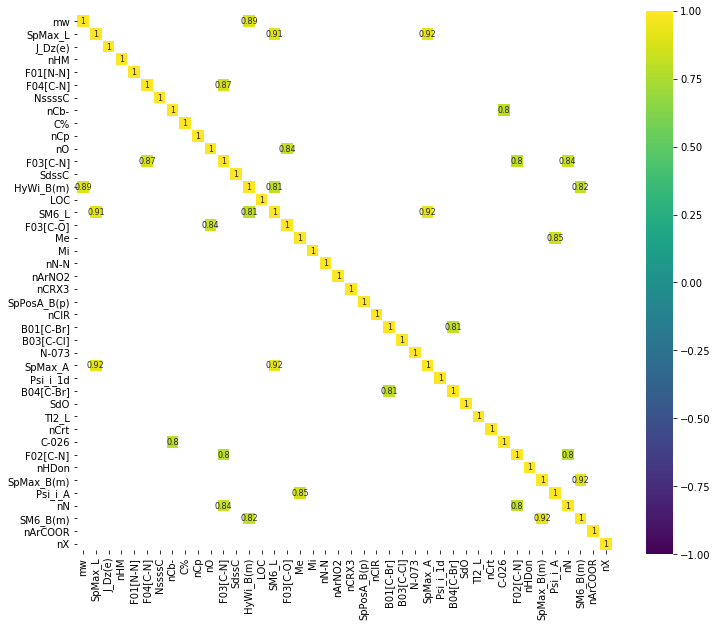

In [19]:
plt.figure(figsize=(12, 10))

sns.heatmap(my_data_num_corr[(my_data_num_corr >= 0.8) | (my_data_num_corr <= -0.8)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

### Correlation of variables
Correlated variables (linearly!) Can be a problem when using some of the algorithms.
Obtaining a high value of the correlation coefficient does not necessarily mean that we have discovered a causal relationship, i.e. the fact that two variables are correlated with each other does not mean that we know the variable that causes the actual state and which is its effect.
In statistics, you usually need to create several hypotheses about correlated variables:
 - variable #1 affects variable #2
 - variable #2 affects variable #1
 - there is a simultaneous effect of variable #1 on variable #2 and variable #2 on variable #1
 - there is an unidentified variable #3 affecting variable #1 and variable #2

We should avoid variables whose correlation is > 0.8 or < -0.8. Therefore, we will now remove these variables (those that are in the upper triangle correlation variables).

In [20]:
upper = my_data_num_corr.where(np.triu(np.ones(my_data_num_corr.shape), k=1).astype(np.bool))
upper

,mw,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,...,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
mw,NaN,0.480456,0.045715,0.438321,0.115186,0.264986,0.370209,0.457707,0.154826,0.330664,...,0.095313,0.394769,0.189499,-0.024670,0.385308,-0.103702,0.102607,0.633994,0.101423,0.405758
SpMax_L,NaN,NaN,0.232683,0.261817,0.022219,0.185560,0.446789,0.423223,0.381464,0.202214,...,0.232447,0.311775,0.137806,0.033485,0.305638,0.101423,0.056802,0.489765,0.086938,0.339627
J_Dz(e),NaN,NaN,NaN,0.067649,-0.094366,-0.186095,0.351183,-0.260477,-0.300082,0.150766,...,-0.203189,-0.113457,-0.181558,0.009668,0.085867,0.513404,-0.088993,0.087903,-0.071860,0.389997
nHM,NaN,NaN,NaN,NaN,0.022182,0.003350,0.068106,0.258438,0.097963,-0.122079,...,0.203298,0.439112,-0.036748,-0.135023,0.458958,0.051879,-0.042725,0.572485,-0.044127,0.542703
F01[N-N],NaN,NaN,NaN,NaN,NaN,0.449388,0.006723,0.191410,-0.038907,0.024662,...,-0.033625,0.212653,0.501351,0.134878,-0.005597,0.023329,0.462634,0.040402,-0.015143,0.000753
F04[C-N],NaN,NaN,NaN,NaN,NaN,NaN,0.001928,0.372453,0.146439,0.007436,...,-0.035533,0.329136,0.789358,0.209706,0.041273,-0.030193,0.745717,0.147088,-0.043254,-0.021033
NssssC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079107,-0.062045,0.450833,...,0.223982,-0.030407,-0.037735,0.017497,0.014806,0.299743,-0.076978,0.121235,-0.037847,0.676194
nCb-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.599244,0.135601,...,-0.122866,0.800326,0.330718,0.113821,0.224343,-0.076045,0.183804,0.402740,0.112426,0.126977
C%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.225157,...,0.049967,0.409265,0.095466,-0.237641,0.149713,-0.249861,-0.091935,0.280505,0.117358,0.046641
nCp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.011669,-0.075862,-0.031050,0.012466,-0.017843,-0.179416,-0.109209,0.031984,-0.021693,-0.046203


In [21]:
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.8)]
to_drop

['F03[C-N]',
 'HyWi_B(m)',
 'SM6_L',
 'F03[C-O]',
 'SpMax_A',
 'B04[C-Br]',
 'C-026',
 'F02[C-N]',
 'Psi_i_A',
 'nN',
 'SM6_B(m)']

In [22]:
my_data.drop(to_drop, axis=1, inplace=True)

In [23]:
nrows = my_data.shape[0]
ncols = my_data.shape[1]

In [24]:
X = my_data.iloc[:,1:(ncols-1)]
X.shape

(1055, 31)

## 7. Data set splitting

In our calculations we will use the so-called k-fold cross validation. In this method, the original set is divided into _k_ subsets (_k_ pairs of training - testing sets), and then each of them is used as a test set, with the remaining ones forming a training set. The modeling is carried out _k_ times to get the all pairs trained and tested. The results are averaged and form the basis of model's assesment.

We use the function `KFold ()` according to the 10-fold cross validation scheme. While we define the so-called seed (`random_state`) and random allocation of records (`shuffle`).

In [25]:
skf = KFold(n_splits=10, shuffle=True, random_state=1234)
skf.get_n_splits(X, y)

10

Scikit-learn offers a code of tools that allow visualization of the assignment to the learning / test collections for validation.
The code available on the website has been modified below to present the breakdown of validation sets [Scikit-Learn](https://scikit-learn.org/stable/modules/cross_validation.html# 'Visualization of validation sets'). Blue bars means the assignment of samples (rows) to the training set, and orange to the test set.

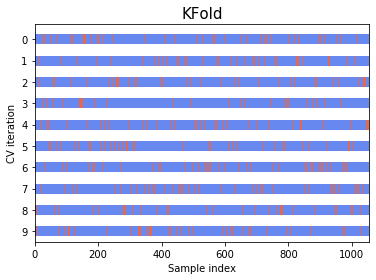

In [26]:
from matplotlib.patches import Patch
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    # Create a sample plot for indices of a cross-validation object.

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

      # Formatting
    yticklabels = list(range(n_splits))
    ax.set(yticks=np.arange(n_splits) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits, -.2], xlim=[0, len(y)])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

fig, ax = plt.subplots()
plot_cv_indices(skf, X, y, ax, skf.get_n_splits(X, y))

With respect to 10-fold cross validation, individual classification algorithms can be implemented by:
 - using the `cross_val_score ()` function
 - calling the `fit ()` method in the `for` loop
It has no effect on the results:

These two methods are given below using the example of the carrier vector method and the measure of matching the model `f1`.
Warning! In Part 8. Modeling, we will use the first method because it is much easier to implement and we need to write less code.

In [27]:
clf = SVC(gamma='auto', kernel='linear', C=1)
scores = cross_validate(clf, X, y.values.ravel(), cv=skf, scoring=['f1_macro'])

In [28]:
for idx in range(len(scores['test_f1_macro'])):
    print('Fold no ', idx+1, ' f1_score = ', scores['test_f1_macro'][idx])
    

Fold no  1  f1_score =  0.8224105646989257
Fold no  2  f1_score =  0.8532012357515715
Fold no  3  f1_score =  0.8433277027027026
Fold no  4  f1_score =  0.8555989465080374
Fold no  5  f1_score =  0.8246228710462288
Fold no  6  f1_score =  0.7795220477952205
Fold no  7  f1_score =  0.8191306110041545
Fold no  8  f1_score =  0.8328912466843501
Fold no  9  f1_score =  0.8626852659110724
Fold no  10  f1_score =  0.9116161616161615


In [29]:
for idx, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    tmp_model = SVC(gamma='auto', kernel='linear', C=1)
    tmp_model.fit(X_train, y_train.values.ravel())
    y_pred = tmp_model.predict(X_test)
    print('Fold no ', idx+1, ' f1_score = ', f1_score(y_test.values.ravel(), y_pred, average='macro'))


Fold no  1  f1_score =  0.8224105646989257
Fold no  2  f1_score =  0.8532012357515715
Fold no  3  f1_score =  0.8433277027027026
Fold no  4  f1_score =  0.8555989465080374
Fold no  5  f1_score =  0.8246228710462288
Fold no  6  f1_score =  0.7795220477952205
Fold no  7  f1_score =  0.8191306110041545
Fold no  8  f1_score =  0.8328912466843501
Fold no  9  f1_score =  0.8626852659110724
Fold no  10  f1_score =  0.9116161616161615


## 8. Modeling

We will start modeling by creating `DataFrame` in which we will save our results.

In [30]:
algos = ['LogReg', 'NB', 'SVM', 'SGD', 'KNN', 'DT','RF']
metrics = ['roc_auc','f1', 'precision', 'recall(sens)', 'accuracy(1-err)']
results = pd.DataFrame(columns=algos, index = metrics)
results

,LogReg,NB,SVM,SGD,KNN,DT,RF
roc_auc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recall(sens),NaN,NaN,NaN,NaN,NaN,NaN,NaN
accuracy(1-err),NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will use error measures such as `roc_auc`, `f1`, `precision`, `recall` i `accuracy`.

In [31]:
scores_to_calc = ['f1_macro','precision_macro','recall_macro', 'roc_auc', 'accuracy']

In [32]:
from warnings import simplefilter
# we will switch off warnings
simplefilter(action='ignore', category=Warning)

### 8.1 Logistic regression
__Definition__: Logistic regression can be used for classification. In this algorithm, the probabilities describing the possible results of a single sample are modeled using a logistic function.

__Advantages__: Logistic regression is a tool adapted to deal with a classification problem and is useful for understanding the impact of several independent variables on a single dependent variable.

__Disadvantages__: For classification problems, it works when the target is binary. Assumption: all predictors are independent of each other and NA is missing.

In [33]:
lr =  LogisticRegressionCV(solver = 'liblinear', max_iter = 100, cv=skf)
lr_clf = cross_validate(lr, X, y.values.ravel(), cv=skf, scoring=scores_to_calc)

In [34]:
results.loc['f1']['LogReg'] = np.mean(lr_clf['test_f1_macro'])
results.loc['precision']['LogReg'] = np.mean(lr_clf['test_precision_macro'])
results.loc['recall(sens)']['LogReg'] = np.mean(lr_clf['test_recall_macro'])
results.loc['accuracy(1-err)']['LogReg'] = np.mean(lr_clf['test_accuracy'])
results.loc['roc_auc']['LogReg'] = np.mean(lr_clf['test_roc_auc'])

In [35]:
results

,LogReg,NB,SVM,SGD,KNN,DT,RF
roc_auc,0.920333,NaN,NaN,NaN,NaN,NaN,NaN
f1,0.839806,NaN,NaN,NaN,NaN,NaN,NaN
precision,0.842182,NaN,NaN,NaN,NaN,NaN,NaN
recall(sens),0.843374,NaN,NaN,NaN,NaN,NaN,NaN
accuracy(1-err),0.857808,NaN,NaN,NaN,NaN,NaN,NaN


### 8.2 Naïve Bayes
__Definition:__ Naive Bayesian classifier based on Bayes theorem with the assumption of independence of predictors (independent variables). Bayesian classifiers, despite limitations, do quite well in real situations.

__Advantages:__ The algorithm requires a small amount of data. Naive Bayesian classifiers are fast compared to more sophisticated methods.

__Disadvantages:__ The calculation uses the product of probabilities - this can be a problem with many independent variables.

In [36]:
nb =  GaussianNB()
nb_clf = cross_validate(nb, X, y.values.ravel(), cv=skf, scoring=scores_to_calc)


In [37]:
results.loc['f1']['NB'] = np.mean(nb_clf['test_f1_macro'])
results.loc['precision']['NB'] = np.mean(nb_clf['test_precision_macro'])
results.loc['roc_auc']['NB'] = np.mean(nb_clf['test_roc_auc'])
results.loc['recall(sens)']['NB'] = np.mean(nb_clf['test_recall_macro'])
results.loc['accuracy(1-err)']['NB'] = np.mean(nb_clf['test_accuracy'])

In [38]:
results

,LogReg,NB,SVM,SGD,KNN,DT,RF
roc_auc,0.920333,0.890493,NaN,NaN,NaN,NaN,NaN
f1,0.839806,0.707047,NaN,NaN,NaN,NaN,NaN
precision,0.842182,0.745086,NaN,NaN,NaN,NaN,NaN
recall(sens),0.843374,0.765305,NaN,NaN,NaN,NaN,NaN
accuracy(1-err),0.857808,0.711869,NaN,NaN,NaN,NaN,NaN


### 8.3 Stochastic Gradient Descent
__Definition:__ Stochastic gradient drop - a simple and efficient tool for fitting linear models. The sklearn package allows the use of various loss functions.

__Advantages:__ Performance and ease of use.

__Disadvantages:__ Slow convergence.

In [39]:
sgd =  SGDClassifier(loss='modified_huber', shuffle=True)
sgd_clf = cross_validate(sgd, X, y.values.ravel(), cv=skf, scoring=scores_to_calc)

In [40]:
results.loc['f1']['SGD'] = np.mean(sgd_clf['test_f1_macro'])
results.loc['precision']['SGD'] = np.mean(sgd_clf['test_precision_macro'])
results.loc['roc_auc']['SGD'] = np.mean(sgd_clf['test_roc_auc'])
results.loc['recall(sens)']['SGD'] = np.mean(sgd_clf['test_recall_macro'])
results.loc['accuracy(1-err)']['SGD'] = np.mean(sgd_clf['test_accuracy'])

In [41]:
results

,LogReg,NB,SVM,SGD,KNN,DT,RF
roc_auc,0.920333,0.890493,NaN,0.890203,NaN,NaN,NaN
f1,0.839806,0.707047,NaN,0.708307,NaN,NaN,NaN
precision,0.842182,0.745086,NaN,0.77883,NaN,NaN,NaN
recall(sens),0.843374,0.765305,NaN,0.715498,NaN,NaN,NaN
accuracy(1-err),0.857808,0.711869,NaN,0.784888,NaN,NaN,NaN


### 8.4 K-Nearest Neighbors
__Definition:__ Classification based on creating "maps" of features in n-dimensional space. To assign a given point to the class, find the K nearest neighbors of each point.

__Advantages:__ Simple and fast algorithm.

__Disadvantages:__ Necessary to determine the value of K. Poor resistance to noisy data.

In [42]:
auc_rate = []
for i in range(1,51):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_clf = cross_validate(knn, X, y.values.ravel(), cv=skf, scoring=scores_to_calc)
    auc_rate.append(np.mean(knn_clf['test_roc_auc']))

Text(0, 0.5, 'AUC Rate')

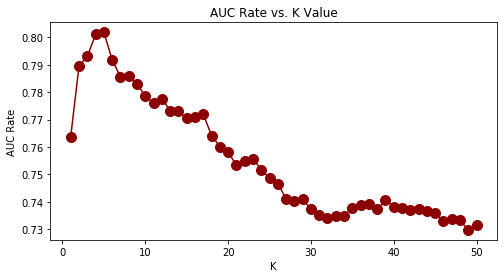

In [43]:
plt.figure(figsize=(8,4))
plt.plot(range(1,51),auc_rate,color='darkred', marker='o',markersize=10)
plt.title('AUC Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('AUC Rate')

In [44]:
knn = KNeighborsClassifier(n_neighbors=4)
knn_clf = cross_validate(knn, X, y.values.ravel(), cv=skf, scoring=scores_to_calc)

In [45]:
results.loc['f1']['KNN'] = np.mean(knn_clf['test_f1_macro'])
results.loc['precision']['KNN'] = np.mean(knn_clf['test_precision_macro'])
results.loc['roc_auc']['KNN'] = np.mean(knn_clf['test_roc_auc'])
results.loc['recall(sens)']['KNN'] = np.mean(knn_clf['test_recall_macro'])
results.loc['accuracy(1-err)']['KNN'] = np.mean(knn_clf['test_accuracy'])

In [46]:
results

,LogReg,NB,SVM,SGD,KNN,DT,RF
roc_auc,0.920333,0.890493,NaN,0.890203,0.801117,NaN,NaN
f1,0.839806,0.707047,NaN,0.708307,0.706065,NaN,NaN
precision,0.842182,0.745086,NaN,0.77883,0.731586,NaN,NaN
recall(sens),0.843374,0.765305,NaN,0.715498,0.699509,NaN,NaN
accuracy(1-err),0.857808,0.711869,NaN,0.784888,0.755553,NaN,NaN


### 8.5 Support Vector Machine
__Definition:__ The support vector machine algorithm divides the decision space by building boundaries separating objects of different class affiliation. Representation are points in space separated by a border (`kernel`) into categories as far as possible from each other. Parameter `C` is a constant in the equation for minimizing the error function.

__Advantages:__ Effective in multi-dimensional spaces, it does not require large amounts of memory.

__Disadvantages:__ High density of points in space can lead to large errors.

Text(0, 0.5, 'AUC Rate')

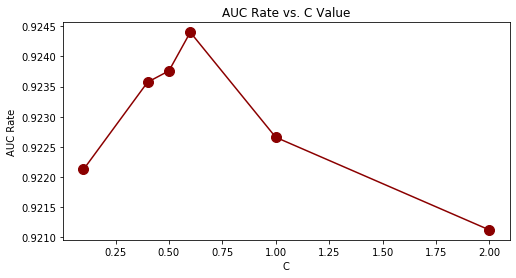

In [47]:
svm_results = []
c_options = [0.1, 0.4, 0.5, 0.6, 1.0, 2.0]
for c_val in c_options:
    svm = SVC(gamma = 'auto', kernel="linear", C=c_val)
    svm_clf = cross_validate(svm, X, y.values.ravel(), cv=skf, scoring=scores_to_calc)
    svm_results.append(np.mean(svm_clf['test_roc_auc']))

plt.figure(figsize=(8,4))
plt.plot(c_options, svm_results, color='darkred', marker='o',markersize=10)
plt.title('AUC Rate vs. C Value')
plt.xlabel('C')
plt.ylabel('AUC Rate')

In [48]:
svm_res = pd.concat([pd.Series(c_options), pd.Series(svm_results)], keys = ['C','res'], axis = 1)
C_res_max = svm_res['C'][svm_res['res'].idxmax()]
C_res_max

0.6

In [49]:
svm = SVC(gamma = 'auto', kernel="linear", C=C_res_max)
svm_clf = cross_validate(svm, X, y.values.ravel(), cv=skf, scoring=scores_to_calc)

In [50]:
results.loc['f1']['SVM'] = np.mean(svm_clf['test_f1_macro'])
results.loc['precision']['SVM'] = np.mean(svm_clf['test_precision_macro'])
results.loc['roc_auc']['SVM'] = np.mean(svm_clf['test_roc_auc'])
results.loc['recall(sens)']['SVM'] = np.mean(svm_clf['test_recall_macro'])
results.loc['accuracy(1-err)']['SVM'] = np.mean(svm_clf['test_accuracy'])

In [51]:
results

,LogReg,NB,SVM,SGD,KNN,DT,RF
roc_auc,0.920333,0.890493,0.924401,0.890203,0.801117,NaN,NaN
f1,0.839806,0.707047,0.839609,0.708307,0.706065,NaN,NaN
precision,0.842182,0.745086,0.842524,0.77883,0.731586,NaN,NaN
recall(sens),0.843374,0.765305,0.841482,0.715498,0.699509,NaN,NaN
accuracy(1-err),0.857808,0.711869,0.857853,0.784888,0.755553,NaN,NaN


### 8.6 Decision Tree
__Definition:__ The decision tree creates a sequence of rules from independent data that can be used to classify data.

__Advantages:__ Easy to interpret and visualize, it can support both numerical data and labels.

__Disadvantages:__ Can create complex structures that generalize badly. Decision trees can be unstable because small differences in data can generate a completely different tree.


Text(0, 0.5, 'AUC Rate')

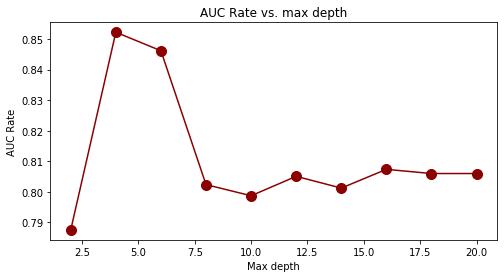

In [52]:
dt_results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    dt_model = DecisionTreeClassifier(max_depth=trees, random_state=123)
    dt_model_clf = cross_validate(dt_model, X, y.values.ravel(), cv=skf, scoring=scores_to_calc)
    dt_results.append(np.mean(dt_model_clf['test_roc_auc']))

plt.figure(figsize=(8,4))
plt.plot(max_depth_options, dt_results, color='darkred', marker='o',markersize=10)
plt.title('AUC Rate vs. max depth')
plt.xlabel('Max depth')
plt.ylabel('AUC Rate')

In [53]:
dt_res = pd.concat([pd.Series(max_depth_options), pd.Series(dt_results)],
                   keys = ['depth','res'], axis = 1)
depth_res_max = dt_res['depth'][dt_res['res'].idxmax()]
depth_res_max

4

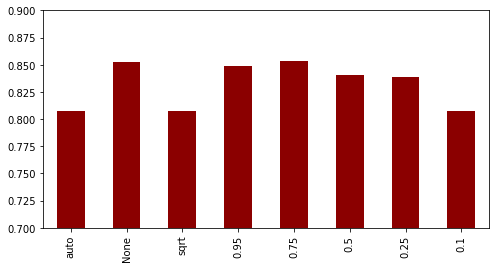

In [54]:
dt_results = []
max_features_options = ['auto',None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    dt_model = DecisionTreeClassifier(max_depth=depth_res_max, max_features = trees, random_state=123)
    dt_model_clf = cross_validate(dt_model, X, y.values.ravel(), cv=skf, scoring=scores_to_calc)
    dt_results.append(np.mean(dt_model_clf['test_roc_auc']))

plt.figure(figsize=(8,4))
pd.Series(dt_results, max_features_options).plot(kind="bar",color="darkred",ylim=(0.7,0.9))

In [55]:
dt_res = pd.concat([pd.Series(max_features_options), pd.Series(dt_results)],
                   keys = ['feature','res'], axis = 1)
feature_res_max = dt_res['feature'][dt_res['res'].idxmax()]
feature_res_max

0.75

Text(0, 0.5, 'AUC Rate')

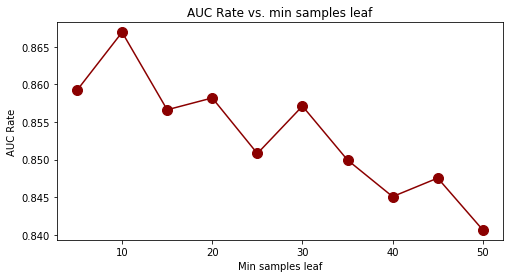

In [56]:
dt_results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    
    dt_model = DecisionTreeClassifier(max_depth=depth_res_max,
                                      max_features = feature_res_max, min_samples_leaf = trees,
                                      random_state=123)
    
    dt_model_clf = cross_validate(dt_model, X, y.values.ravel(), cv=skf, scoring=scores_to_calc)
    dt_results.append(np.mean(dt_model_clf['test_roc_auc']))

plt.figure(figsize=(8,4))
plt.plot(min_samples_leaf_options, dt_results, color='darkred', marker='o',markersize=10)
plt.title('AUC Rate vs. min samples leaf')
plt.xlabel('Min samples leaf')
plt.ylabel('AUC Rate')

In [57]:
dt_res = pd.concat([pd.Series(min_samples_leaf_options), pd.Series(dt_results)],
                   keys = ['leaf','res'], axis = 1)
leaf_res_max = dt_res['leaf'][dt_res['res'].idxmax()]
leaf_res_max

10

In [58]:
dtree = DecisionTreeClassifier(max_depth=depth_res_max, max_features = feature_res_max,
                               min_samples_leaf = leaf_res_max, random_state=123)
dtree_clf = cross_validate(dtree, X, y.values.ravel(), cv=skf, scoring=scores_to_calc)

In [59]:
results.loc['f1']['DT'] = np.mean(dtree_clf['test_f1_macro'])
results.loc['precision']['DT'] = np.mean(dtree_clf['test_precision_macro'])
results.loc['roc_auc']['DT'] = np.mean(dtree_clf['test_roc_auc'])
results.loc['recall(sens)']['DT'] = np.mean(dtree_clf['test_recall_macro'])
results.loc['accuracy(1-err)']['DT'] = np.mean(dtree_clf['test_accuracy'])

In [60]:
results

,LogReg,NB,SVM,SGD,KNN,DT,RF
roc_auc,0.920333,0.890493,0.924401,0.890203,0.801117,0.866919,NaN
f1,0.839806,0.707047,0.839609,0.708307,0.706065,0.787515,NaN
precision,0.842182,0.745086,0.842524,0.77883,0.731586,0.815195,NaN
recall(sens),0.843374,0.765305,0.841482,0.715498,0.699509,0.774822,NaN
accuracy(1-err),0.857808,0.711869,0.857853,0.784888,0.755553,0.820872,NaN


### 8.7 Random Forest
__Definition:__ Random forest - a classifier made up of many decision trees of different structure. The prediction result is calculated as the average of the results from the decision trees.

__Advantages:__ Generalize better than decision trees.

__Disadvantages:__ Long learning time, therefore the use for real-time learning and prediction is quite limited, difficult to interpret.


Text(0, 0.5, 'AUC Rate')

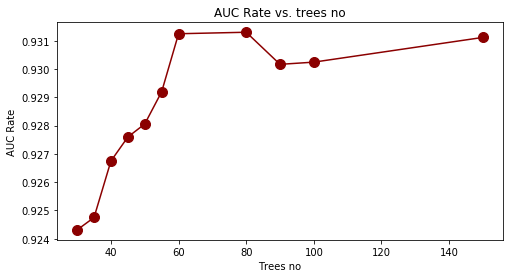

In [61]:
rf_results = []
n_estimator_options = [30,35,40,45,50,55,60,80,90,100,150]
for trees in n_estimator_options:
    rf_model = RandomForestClassifier(trees, oob_score=True,
                                      n_jobs=-1, random_state=12345)
    rf_model_clf = cross_validate(rf_model, X, y.values.ravel(), cv=skf, scoring=scores_to_calc)
    rf_results.append(np.mean(rf_model_clf['test_roc_auc']))

plt.figure(figsize=(8,4))
plt.plot(n_estimator_options, rf_results, color='darkred', marker='o',markersize=10)
plt.title('AUC Rate vs. trees no')
plt.xlabel('Trees no')
plt.ylabel('AUC Rate')

In [62]:
rf_res = pd.concat([pd.Series(n_estimator_options), pd.Series(rf_results)],
                   keys = ['n','res'], axis = 1)
n_res_max = rf_res['n'][rf_res['res'].idxmax()]
n_res_max

80

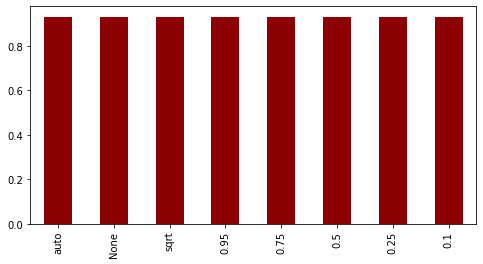

In [63]:
rf_results = []
max_features_options = ['auto',None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model = RandomForestClassifier(n_estimators=n_res_max, oob_score=True,
                                   n_jobs=-1, random_state=12345, max_features = trees)
    rf_model_clf = cross_validate(rf_model, X, y.values.ravel(), cv=skf, scoring=scores_to_calc)
    rf_results.append(np.mean(rf_model_clf['test_roc_auc']))

plt.figure(figsize=(8,4))

pd.Series(rf_results, max_features_options).plot(kind="bar",color="darkred")

In [64]:
rf_res = pd.concat([pd.Series(max_features_options), pd.Series(rf_results)],
                   keys = ['feature','res'], axis = 1)
feature_res_max = rf_res['feature'][rf_res['res'].idxmax()]
feature_res_max

'auto'

Text(0, 0.5, 'AUC Rate')

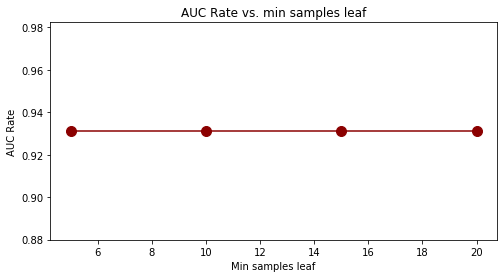

In [65]:
rf_results = []
min_samples_leaf_options = [5,10,15,20]
for trees in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=n_res_max, oob_score=True,
                                   n_jobs=-1, random_state=12345, max_features = feature_res_max,
                                   min_samples_leaf = trees)
    rf_model_clf = cross_validate(rf_model, X, y.values.ravel(), cv=skf, scoring=scores_to_calc)
    rf_results.append(np.mean(rf_model_clf['test_roc_auc']))

plt.figure(figsize=(8,4))
plt.plot(min_samples_leaf_options, rf_results, color='darkred', marker='o',markersize=10)
plt.title('AUC Rate vs. min samples leaf')
plt.xlabel('Min samples leaf')
plt.ylabel('AUC Rate')

In [66]:
rf_res = pd.concat([pd.Series(min_samples_leaf_options), pd.Series(rf_results)],
                   keys = ['leaf','res'], axis = 1)
leaf_res_max = rf_res['leaf'][rf_res['res'].idxmax()]
leaf_res_max

5

In [67]:
rfm = RandomForestClassifier(n_estimators=n_res_max, oob_score=True,
                             n_jobs=-1, random_state=12345,
                             max_features = feature_res_max, min_samples_leaf = leaf_res_max)
rfm_clf = cross_validate(rfm, X, y.values.ravel(), cv=skf, scoring=scores_to_calc)

In [68]:
results.loc['f1']['RF'] = np.mean(rfm_clf['test_f1_macro'])
results.loc['precision']['RF'] = np.mean(rfm_clf['test_precision_macro'])
results.loc['roc_auc']['RF'] = np.mean(rfm_clf['test_roc_auc'])
results.loc['recall(sens)']['RF'] = np.mean(rfm_clf['test_recall_macro'])
results.loc['accuracy(1-err)']['RF'] = np.mean(rfm_clf['test_accuracy'])

## 9. Methods' comparison

Results table:

In [69]:
results

,LogReg,NB,SVM,SGD,KNN,DT,RF
roc_auc,0.920333,0.890493,0.924401,0.890203,0.801117,0.866919,0.928725
f1,0.839806,0.707047,0.839609,0.708307,0.706065,0.787515,0.845087
precision,0.842182,0.745086,0.842524,0.77883,0.731586,0.815195,0.857604
recall(sens),0.843374,0.765305,0.841482,0.715498,0.699509,0.774822,0.839136
accuracy(1-err),0.857808,0.711869,0.857853,0.784888,0.755553,0.820872,0.865454


From what can be observed, the __RF__ model shows the highest accuracy of classification. It should be noted that this is an average result for 10 models trained in accordance with the 10-fold cross validation scheme.

__Is that all?__

Not quite, the last stage of modeling is perhaps the most important. __Model validation__. We will try to check how the model deals with predictions on so-called external data.

In [70]:
external_data = pd.read_csv('ci4000213_si_001_external_validation.csv', sep = '\t')

In [71]:
external_data = external_data.iloc[:,3:] # dataFrame.iloc[<ROWS RANGE> , <COLUMNS RANGE>] # <from : to>

In [72]:
external_data

,mw,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,Class
0,584.97150,5.146,2.354,1,1,15,0,9,39.4,2,...,8,17,1,4.062,2.791,6,9.906,0,1,NRB
1,550.52644,5.127,2.309,0,1,15,0,8,39.4,2,...,7,17,1,3.959,2.767,6,9.783,0,0,NRB
2,394.45792,4.958,1.994,1,1,13,0,6,41.3,2,...,3,13,0,4.297,2.482,6,9.680,0,0,NRB
3,404.32410,5.014,1.937,3,1,10,0,6,43.9,1,...,4,11,0,4.354,2.297,5,9.780,0,2,NRB
4,404.32410,4.970,1.922,3,1,10,0,6,43.9,1,...,4,11,0,4.328,2.297,5,9.780,0,2,NRB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,270.35192,5.389,2.923,1,0,5,0,2,33.3,2,...,1,2,2,4.710,2.690,2,9.599,0,0,NRB
666,278.30116,5.113,4.749,2,0,0,0,0,20.0,0,...,0,0,2,4.697,3.656,0,10.033,0,0,NRB
667,810.98552,6.049,1.411,0,0,16,5,6,39.3,3,...,2,15,3,4.052,2.236,4,10.003,0,0,NRB
668,824.96864,6.050,1.429,0,0,16,5,6,39.7,3,...,2,15,3,4.053,2.315,4,10.028,0,0,NRB


In [73]:
external_data.drop(to_drop, axis=1, inplace=True)
external_data

,mw,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,...,N-073,Psi_i_1d,SdO,TI2_L,nCrt,nHDon,SpMax_B(m),nArCOOR,nX,Class
0,584.97150,5.146,2.354,1,1,15,0,9,39.4,2,...,0,0.000,68.836,4.958,0,1,4.062,0,1,NRB
1,550.52644,5.127,2.309,0,1,15,0,8,39.4,2,...,0,0.000,68.414,4.899,0,1,3.959,0,0,NRB
2,394.45792,4.958,1.994,1,1,13,0,6,41.3,2,...,0,0.000,21.767,5.289,0,0,4.297,0,0,NRB
3,404.32410,5.014,1.937,3,1,10,0,6,43.9,1,...,0,0.000,0.000,5.224,0,0,4.354,0,2,NRB
4,404.32410,4.970,1.922,3,1,10,0,6,43.9,1,...,0,0.000,0.000,5.251,0,0,4.328,0,2,NRB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,270.35192,5.389,2.923,1,0,5,0,2,33.3,2,...,0,0.000,35.002,4.091,0,2,4.710,0,0,NRB
666,278.30116,5.113,4.749,2,0,0,0,0,20.0,0,...,0,-0.001,42.133,4.356,0,2,4.697,0,0,NRB
667,810.98552,6.049,1.411,0,0,16,5,6,39.3,3,...,1,0.000,42.727,3.557,3,3,4.052,0,0,NRB
668,824.96864,6.050,1.429,0,0,16,5,6,39.7,3,...,1,0.000,56.437,3.526,3,3,4.053,0,0,NRB


In [74]:
X_val = external_data.iloc[ : , :31]
y_val = external_data.iloc[ : , 31: ]

In [75]:
final_model = rfm.fit(X,y)
final_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=12345, verbose=0,
                       warm_start=False)

In [76]:
mean_acc = final_model.score(X_val,y_val)
print('Mean accuracy: ' + str(mean_acc))

Mean accuracy: 0.8835820895522388


In [77]:
y_pred = final_model.predict(X_val)

In [78]:
final_model.classes_

array(['NRB', 'RB'], dtype=object)

In [80]:
from sklearn.metrics import precision_recall_fscore_support

precision_val, recall_val, fscore_val, support_val = precision_recall_fscore_support(y_val, y_pred,
                                                                                average = None)

In [81]:
# Recall for 'NRB'
recall_val[0] 

0.9457202505219207

In [82]:
# Recall for 'RB'
recall_val[1]

0.7277486910994765